## Imports

In [ ]:
!pip install tensorflow[and-cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 925.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 61.5 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Thu May  2 06:44:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
print(tf.__version__)

2.16.1


In [ ]:
import keras
from keras import layers
from keras.layers import Dense, MaxPooling2D, Conv2D, Rescaling, AveragePooling2D, Flatten
from keras.models import Sequential
from keras.models import load_model
from keras.losses import SparseCategoricalCrossentropy
# from keras.preprocessing.image import ImageDataGenerator


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

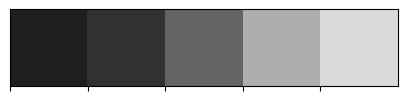

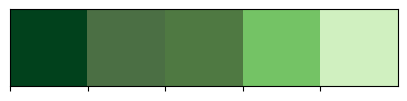

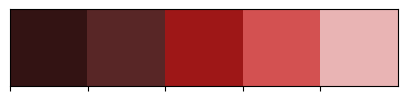

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

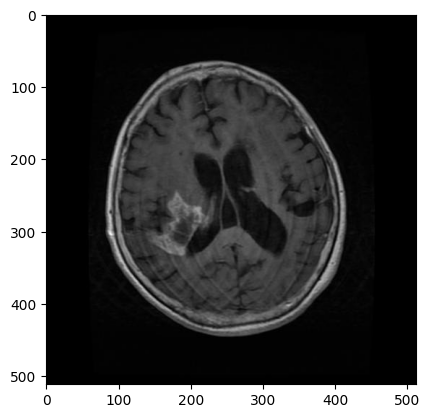

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Projects/BTC/data/Training/glioma_tumor/gg (20).jpg')
plt.imshow(img)

## Importing the data

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

X_train = []
y_train = []
image_size = 150

# Assuming 'labels' contains the list of class labels

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Projects/BTC/data', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img_path = os.path.join(folderPath, j)
        if os.path.isfile(img_path):  # Check if file exists
            img = cv2.imread(img_path)
            if img is not None and img.size != 0:  # Check if image is not None and not empty
                img = cv2.resize(img, (image_size, image_size))
                X_train.append(img)
                y_train.append(i)
            else:
                print(f"Skipping empty or invalid image: {img_path}")

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Projects/BTC/data', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img_path = os.path.join(folderPath, j)
        if os.path.isfile(img_path):  # Check if file exists
            img = cv2.imread(img_path)
            if img is not None and img.size != 0:  # Check if image is not None and not empty
                img = cv2.resize(img, (image_size, image_size))
                X_train.append(img)
                y_train.append(i)
            else:
                print(f"Skipping empty or invalid image: {img_path}")

X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 74/74 [00:20<00:00,  3.61it/s]


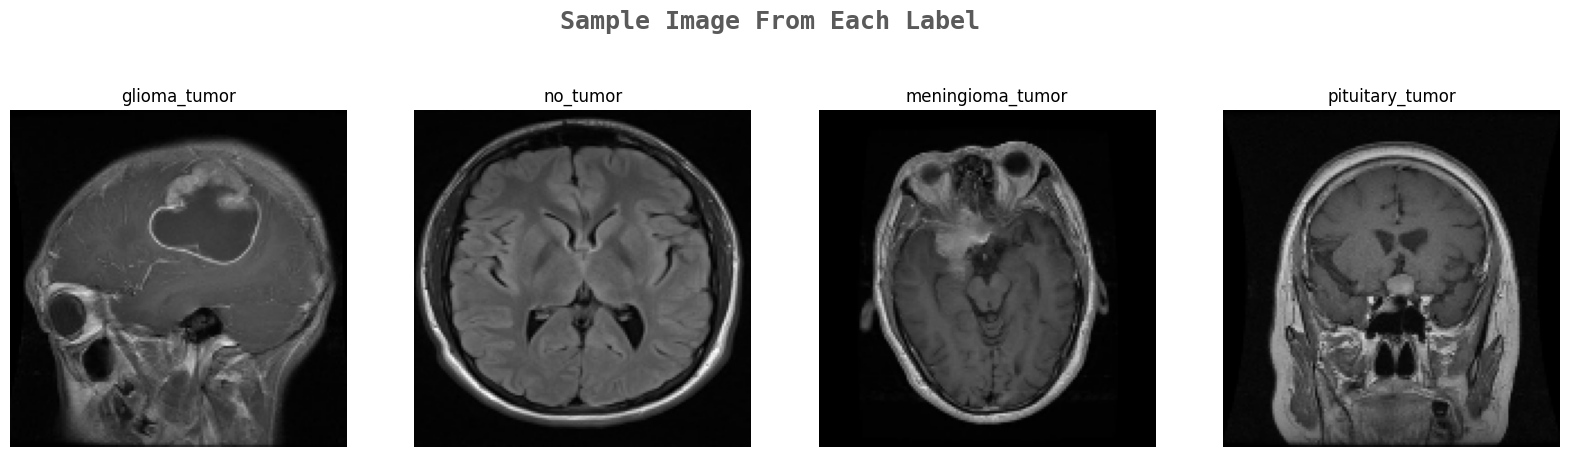

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(3264, 150, 150, 3)

In [ ]:
print(X_train.max())

255


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
print(labels)

['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']


In [ ]:
num_classes = len(labels)

## Scale the Data

In [ ]:
X_train = X_train/255
X_test = X_test/255

## Configure the Dataset For Performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'train_ds' is not defined

## Model Building

## Helper Functions

In [ ]:
num_classes = len(class_names)

### Testing function

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model_performance(model, history, X_test, y_test, labels):
    # Plot training and validation accuracy/loss
    epochs = range(1, len(history.history['accuracy']) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color='blue', y=1, x=0.28, alpha=0.8)

    sns.despine()
    ax[0].plot(epochs, train_acc, marker='o', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, marker='o', label='Validation Accuracy')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    sns.despine()
    ax[1].plot(epochs, train_loss, marker='o', label='Training Loss')
    ax[1].plot(epochs, val_loss, marker='o', label='Validation Loss')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Loss')

    plt.show()

    # Predicting
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    y_test_new = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_test_new, pred))

    # Confusion matrix heatmap
    fig, ax = plt.subplots(1, 1, figsize=(14, 7))
    sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
                cmap='Blues', alpha=0.7, linewidths=2)
    fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
             fontname='monospace', color='blue', y=0.92, x=0.28, alpha=0.8)

    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model_performance(model, history, X_test, y_test, labels):
    # Plot training and validation accuracy/loss
    epochs = range(1, len(history.history['accuracy']) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
             fontname='monospace', color='blue', y=1, x=0.28, alpha=0.8)

    sns.despine()
    ax[0].plot(epochs, train_acc, marker='o', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, marker='o', label='Validation Accuracy')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    sns.despine()
    ax[1].plot(epochs, train_loss, marker='o', label='Training Loss')
    ax[1].plot(epochs, val_loss, marker='o', label='Validation Loss')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Loss')

    plt.show()

    # Predicting
    # Set dropout layers to training=False explicitly
    for layer in model.layers:
        if isinstance(layer, keras.layers.Dropout):
            layer.training = False

    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    y_test_new = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_test_new, pred))

    # Confusion matrix heatmap
    fig, ax = plt.subplots(1, 1, figsize=(14, 7))
    sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
                cmap=colors_green[::-1], alpha=0.7, linewidths=2)
    fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
             fontname='monospace', color='blue', y=0.92, x=0.28, alpha=0.8)

    plt.show()


## LeNet5

In [ ]:
num_classes = len(labels)

LeNet5_model1 = Sequential([
    Conv2D(filters = 6, kernel_size = (5,5), strides = 1, activation = 'relu', input_shape = (150,150, 3)),
    AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    Conv2D(filters = 16, kernel_size = (5,5), strides = 1, activation = 'relu'),
    AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(units = 120, activation = 'relu'),
    Dense(units = 84, activation = 'relu'),
    Dense(units = num_classes,activation='softmax')
])

In [ ]:
# Iteration 2
num_classes = len(labels)

LeNet5_model2 = Sequential([
    Conv2D(filters = 6, kernel_size = (5,5), strides = 1, activation = 'relu', input_shape = (150,150, 3)),
    AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    Conv2D(filters = 16, kernel_size = (5,5), strides = 1, activation = 'relu'),
    AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    Flatten(),
    Dense(units = 120, activation = 'relu'),
    Dense(units = 84, activation = 'relu'),
    Dense(units = num_classes,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
LeNet5_model2.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
LeNet5_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 146, 146, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 73, 73, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 69, 69, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 34, 34, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │       2,219,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,233,016 (8.52 MB)

 Trainable params: 2,233,016 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = LeNet5_model2.fit(
    X_train/255, y_train,
    validation_split=0.1, epochs =epochs, verbose=1, batch_size=16
)

Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.4741 - loss: 1.1868 - val_accuracy: 0.7517 - val_loss: 0.6588
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7888 - loss: 0.5467 - val_accuracy: 0.7925 - val_loss: 0.5033
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8806 - loss: 0.3375 - val_accuracy: 0.8571 - val_loss: 0.3849
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9467 - loss: 0.1597 - val_accuracy: 0.8673 - val_loss: 0.3462
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9581 - loss: 0.1204 - val_accuracy: 0.8776 - val_loss: 0.3537
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9699 - loss: 0.0880 - val_accuracy: 0.8776 - val_loss: 0.3301
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.8878 - val_loss: 0.4320
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9941 - loss: 0.0232 - val_accuracy:

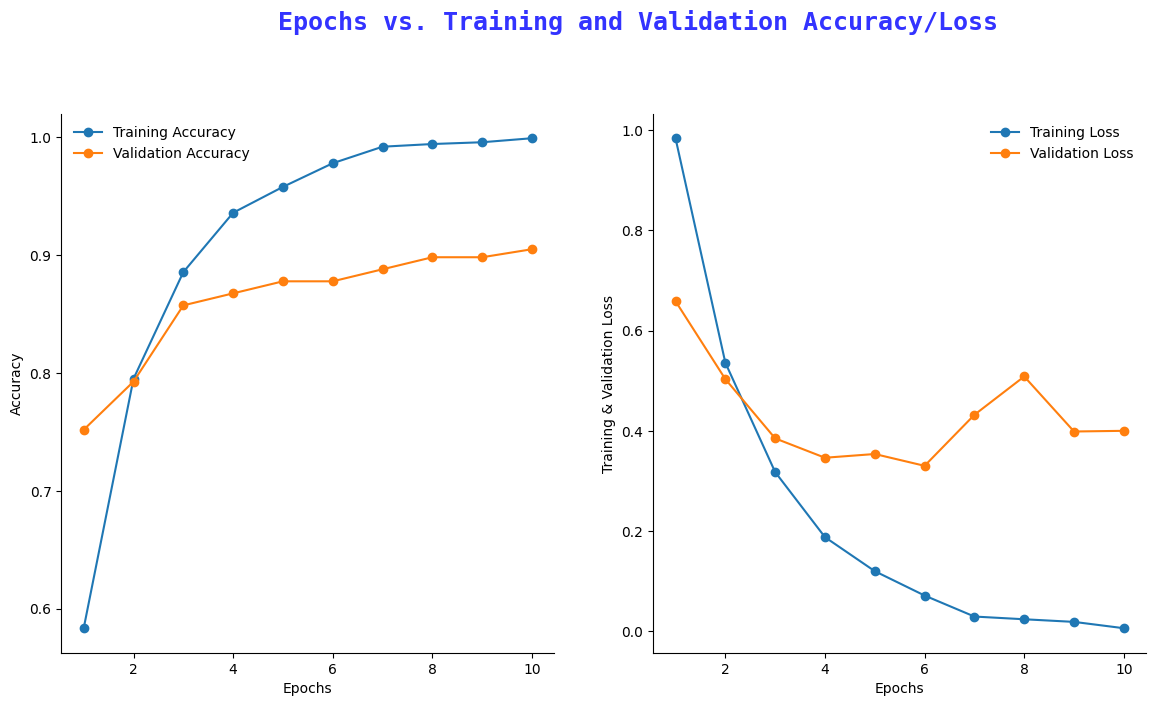

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        93
           1       0.84      0.80      0.82        51
           2       0.62      0.94      0.75        96
           3       0.92      0.98      0.95        87

    accuracy                           0.77       327
   macro avg       0.82      0.78      0.77       327
weighted avg       0.81      0.77      0.76       327



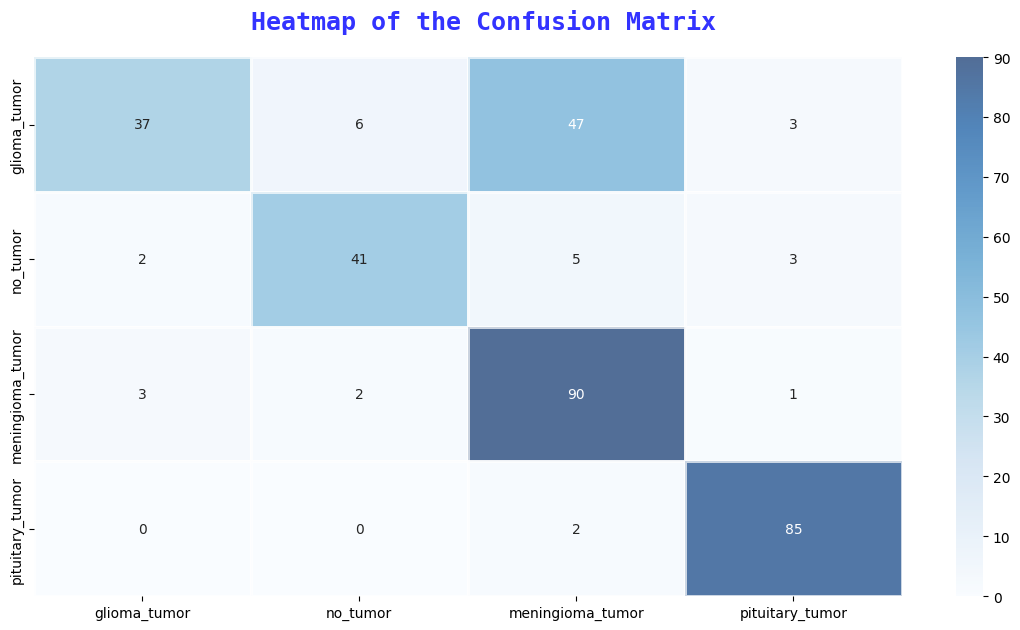

In [ ]:
evaluate_model_performance(LeNet5_model2, history, X_test, y_test, labels)

In [ ]:
LeNet5_model2.save('/content/drive/MyDrive/Colab Notebooks/Projects/BTC/models/Lenet_5_2.keras')

In [ ]:
%reset -f

## AlexNet

### Architecure

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(units = num_classes,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 35, 35, 128)         │          46,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 35, 35, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 17, 17, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 17, 17, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 5, 5, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │           4,1

 Total params: 3,695,620 (14.10 MB)

 Trainable params: 3,693,316 (14.09 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
epochs = 10
history = model.fit(
    X_train/255, y_train,
    validation_split=0.1, epochs =epochs, verbose=1, batch_size=.
)

Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.4796 - loss: 2.0907 - val_accuracy: 0.4422 - val_loss: 1.4085
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6257 - loss: 0.9775 - val_accuracy: 0.5272 - val_loss: 1.3144
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6837 - loss: 0.7833 - val_accuracy: 0.7619 - val_loss: 0.5939
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7457 - loss: 0.6480 - val_accuracy: 0.6429 - val_loss: 0.7228
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7649 - loss: 0.5829 - val_accuracy: 0.7313 - val_loss: 0.6361
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8293 - loss: 0.4252 - val_accuracy: 0.8639 - val_loss: 0.4013
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8508 - loss: 0.4161 - val_accuracy: 0.7687 - val_loss: 0.5971
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8859 - loss: 0.3063 - val_acc

In [ ]:
# Iteration 2
epochs = 20
history = model.fit(
    X_train/255, y_train,
    validation_split=0.1, epochs =epochs, verbose=1, batch_size=16
)

Epoch 1/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.4608 - loss: 2.1809 - val_accuracy: 0.3367 - val_loss: 2.0986
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5887 - loss: 1.0387 - val_accuracy: 0.4660 - val_loss: 1.3418
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6664 - loss: 0.8086 - val_accuracy: 0.7211 - val_loss: 0.6534
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7318 - loss: 0.6524 - val_accuracy: 0.7177 - val_loss: 0.7478
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7564 - loss: 0.5882 - val_accuracy: 0.7755 - val_loss: 0.6552
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8304 - loss: 0.4536 - val_accuracy: 0.7857 - val_loss: 0.5019
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8572 - loss: 0.3769 - val_accuracy: 0.7857 - val_loss: 0.5179
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8607 - loss: 0.3830 - val_acc

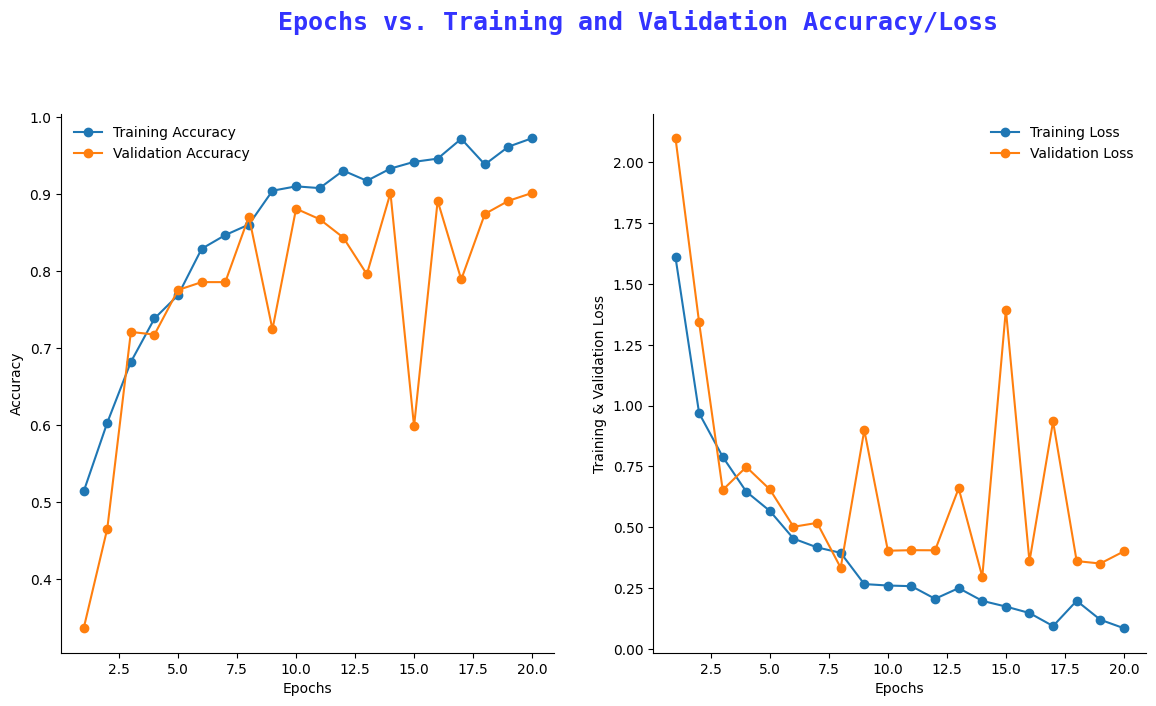

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.19      0.73      0.30        51
           2       0.33      0.44      0.37        96
           3       0.00      0.00      0.00        87

    accuracy                           0.24       327
   macro avg       0.13      0.29      0.17       327
weighted avg       0.12      0.24      0.16       327



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


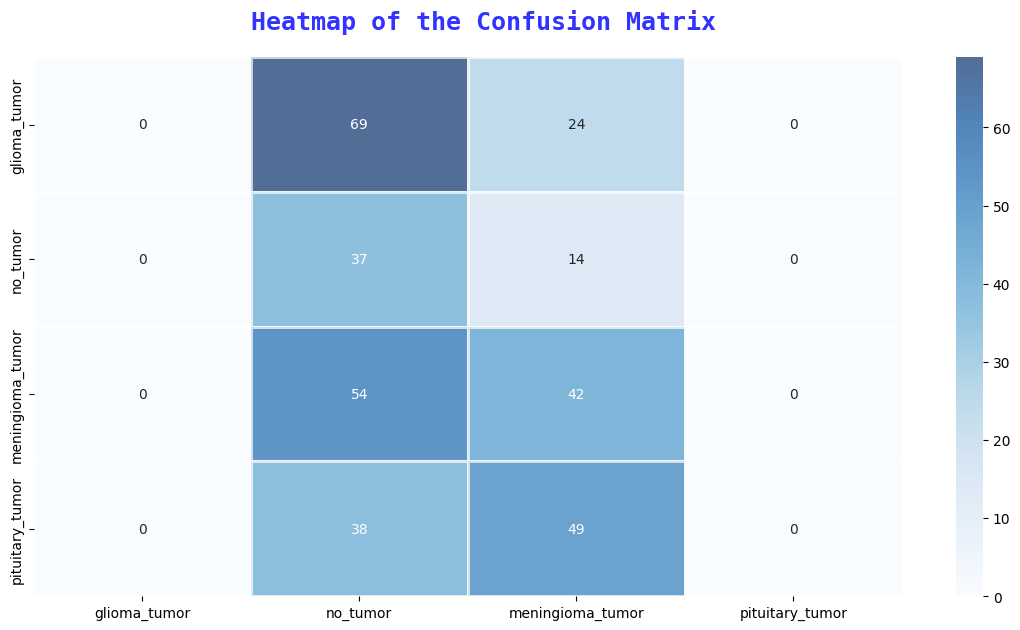

In [ ]:
evaluate_model_performance(model, history, X_test, y_test, labels)

## VGG - 16

In [ ]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dropout
from keras.models import Model

In [ ]:
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
my_new_model = vgg16.output
my_new_model = GlobalAveragePooling2D()(my_new_model)
my_new_model = Dropout(rate=0.5)(my_new_model)
my_new_model = Dense(num_classes,activation='softmax')(my_new_model)
my_new_model = Model(inputs=vgg16.input, outputs = my_new_model)

In [ ]:
my_new_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │              

 Total params: 14,716,740 (56.14 MB)

 Trainable params: 14,716,740 (56.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
my_new_model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
history = my_new_model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32)

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 537ms/step - accuracy: 0.2839 - loss: 5.6043 - val_accuracy: 0.2789 - val_loss: 1.3701
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.2946 - loss: 1.3602 - val_accuracy: 0.3265 - val_loss: 1.2142
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.4059 - loss: 1.1964 - val_accuracy: 0.3776 - val_loss: 1.2154
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.4450 - loss: 1.1807 - val_accuracy: 0.4966 - val_loss: 1.0611
Epoch 5/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.5154 - loss: 1.0480 - val_accuracy: 0.5306 - val_loss: 1.0533
Epoch 6/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.5264 - loss: 1.0168 - val_accuracy: 0.6020 - val_loss: 0.9861
Epoch 7/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.5572 - loss: 0.9712 - val_accuracy: 0.5204 - val_loss: 1.1604
Epoch 8/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.6128 - loss: 0.9908 - val_accu

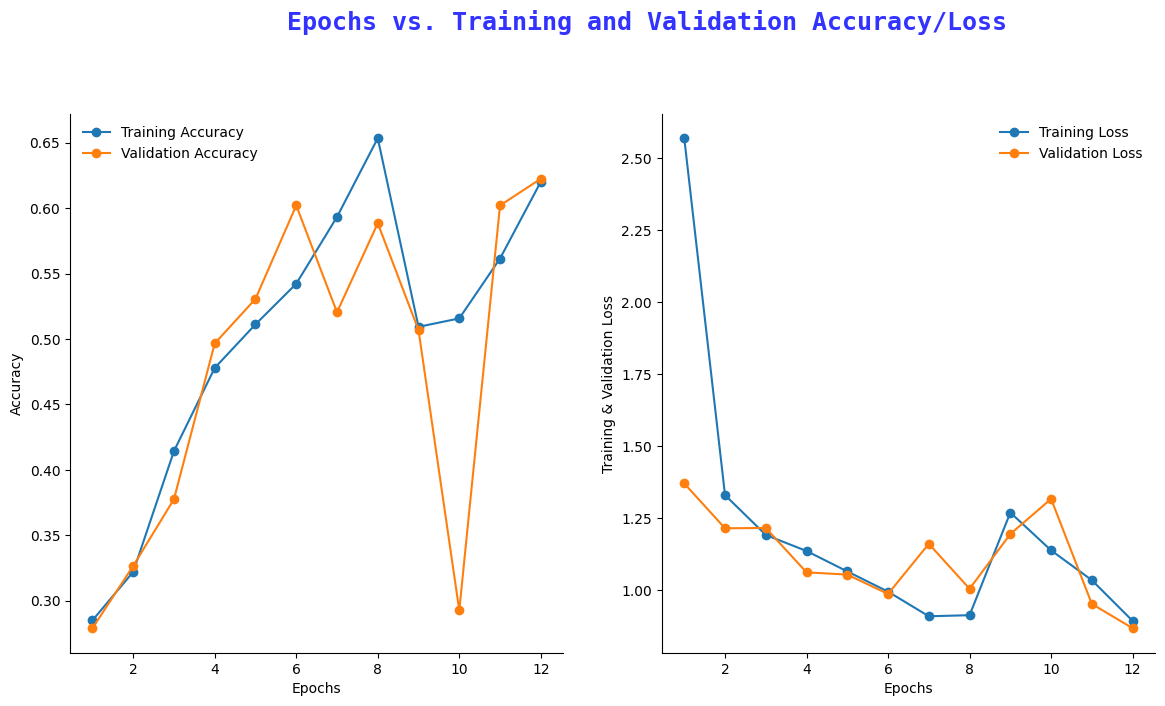

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 545ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        93
           1       0.55      0.92      0.69        51
           2       0.62      0.14      0.22        96
           3       0.70      0.90      0.78        87

    accuracy                           0.60       327
   macro avg       0.60      0.64      0.57       327
weighted avg       0.60      0.60      0.54       327



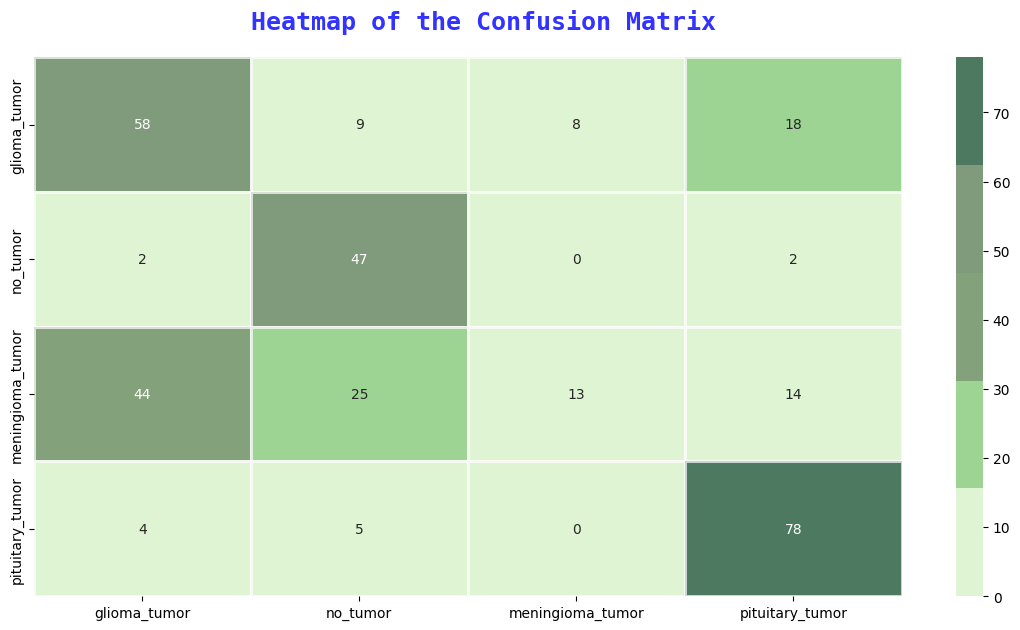

In [ ]:
evaluate_model_performance(my_new_model, history, X_test, y_test, labels)

In [ ]:
# Iteration 2
history = my_new_model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=16)

Epoch 1/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 56s 193ms/step - accuracy: 0.2856 - loss: 3.1553 - val_accuracy: 0.2687 - val_loss: 1.3572
Epoch 2/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 49s 123ms/step - accuracy: 0.2955 - loss: 1.3704 - val_accuracy: 0.2925 - val_loss: 1.3688
Epoch 3/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.3156 - loss: 1.3738 - val_accuracy: 0.2789 - val_loss: 1.3660
Epoch 4/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.2731 - loss: 1.3644 - val_accuracy: 0.2789 - val_loss: 1.3625
Epoch 5/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.2813 - loss: 1.3625 - val_accuracy: 0.2789 - val_loss: 1.3607
Epoch 6/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.3166 - loss: 1.3567 - val_accuracy: 0.2789 - val_loss: 1.3598
Epoch 7/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.2879 - loss: 1.3556 - val_accuracy: 0.2789 - val_loss: 1.3592
Epoch 8/12
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.2912 - loss: 1

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model and new classification layers
my_new_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
my_new_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print model summary
my_new_model.summary()

# Train the model
history = my_new_model.fit(X_train, y_train, validation_split=0.1, epochs=12, batch_size=32)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │              

 Total params: 14,716,740 (56.14 MB)

 Trainable params: 2,052 (8.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.3767 - loss: 6.0969 - val_accuracy: 0.6361 - val_loss: 1.9409
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.5424 - loss: 3.1599 - val_accuracy: 0.6939 - val_loss: 1.3790
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.6083 - loss: 2.2431 - val_accuracy: 0.7313 - val_loss: 1.1040
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.6525 - loss: 1.6092 - val_accuracy: 0.7381 - val_loss: 0.9800
Epoch 5/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.6864 - loss: 1.2254 - val_accuracy: 0.7551 - val_loss: 0.8836
Epoch 6/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.7037 - loss: 1.0907 - val_accuracy: 0.7959 - val_loss: 0.6738
Epoch 7/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.7192 - loss: 0.9653 - val_accuracy: 0.7993 - val_loss: 0.6651
Epoch 8/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.7176 - loss: 0.9625 - val_accuracy: 0.802

In [ ]:
# Load pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model and new classification layers
my_new_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
my_new_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Print model summary
my_new_model.summary()

# Train the model
history = my_new_model.fit(X_train, y_train, validation_split=0.1, epochs=18, batch_size=32)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │              

 Total params: 14,716,740 (56.14 MB)

 Trainable params: 2,052 (8.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.3167 - loss: 7.4554 - val_accuracy: 0.6497 - val_loss: 1.7079
Epoch 2/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.5114 - loss: 3.6292 - val_accuracy: 0.7109 - val_loss: 1.2306
Epoch 3/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.5874 - loss: 2.4228 - val_accuracy: 0.7381 - val_loss: 1.1111
Epoch 4/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.6580 - loss: 1.8562 - val_accuracy: 0.7381 - val_loss: 0.9658
Epoch 5/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.6886 - loss: 1.2760 - val_accuracy: 0.7687 - val_loss: 0.7876
Epoch 6/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7196 - loss: 1.0182 - val_accuracy: 0.7687 - val_loss: 0.7320
Epoch 7/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.7089 - loss: 0.9918 - val_accuracy: 0.7823 - val_loss: 0.6371
Epoch 8/18
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.7136 - loss: 0.9280 - val_accuracy: 0.78

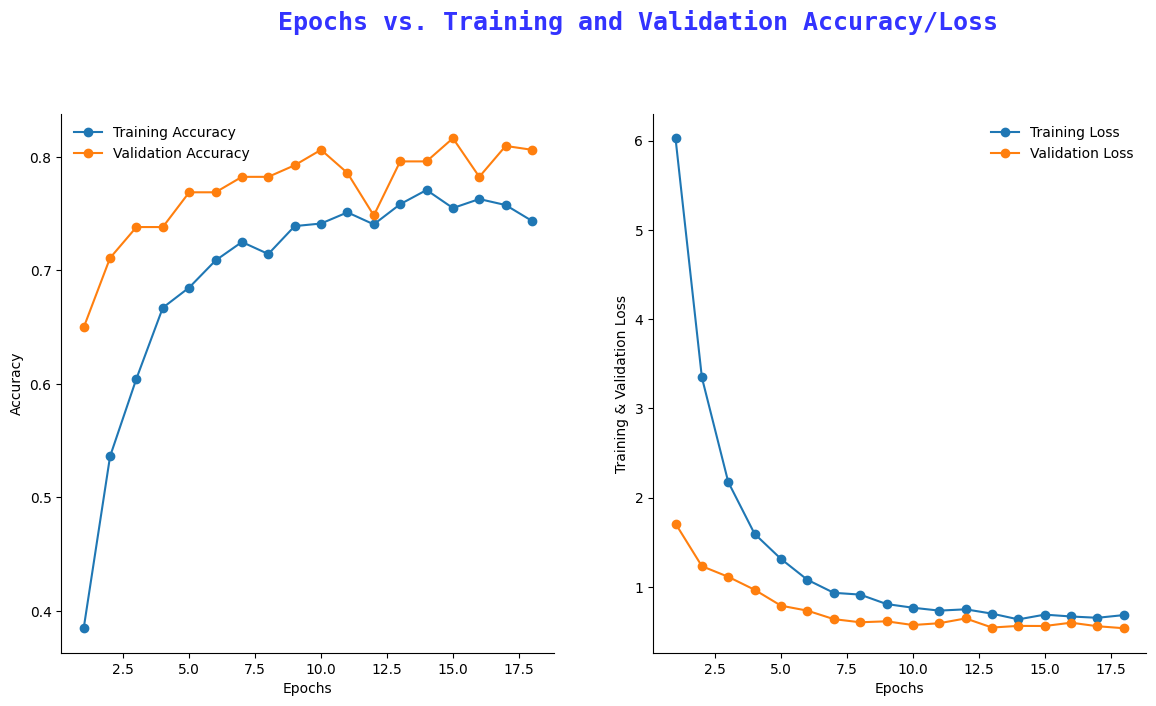

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        93
           1       0.88      0.75      0.81        51
           2       0.81      0.73      0.77        96
           3       0.84      0.92      0.88        87

    accuracy                           0.82       327
   macro avg       0.83      0.82      0.82       327
weighted avg       0.82      0.82      0.82       327



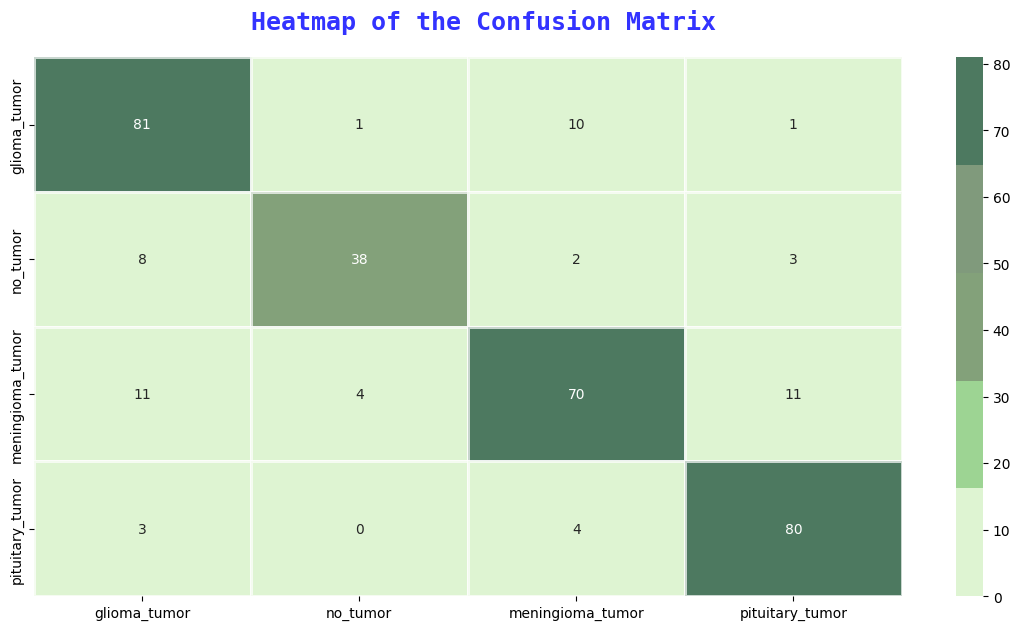

In [ ]:
evaluate_model_performance(my_new_model, history, X_test, y_test, labels)

## Efficient Net

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(len(labels),activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 150, 150, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 150, 150, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 151, 151, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 75, 75, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 75, 75, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 75, 75, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("effnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.7398 - loss: 0.6538
Epoch 1: val_accuracy improved from -inf to 0.83673, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 179s 971ms/step - accuracy: 0.7408 - loss: 0.6515 - val_accuracy: 0.8367 - val_loss: 0.7191 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9427 - loss: 0.1687
Epoch 2: val_accuracy improved from 0.83673 to 0.88095, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9427 - loss: 0.1687 - val_accuracy: 0.8810 - val_loss: 0.4011 - learning_rate: 0.0010
Epoch 3/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9683 - loss: 0.1005
Epoch 3: val_accuracy did not improve from 0.88095
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.9681 - loss: 0.1010 - val_accuracy: 0.8435 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9766 - loss: 0.0822
Epoch 4: val_accur

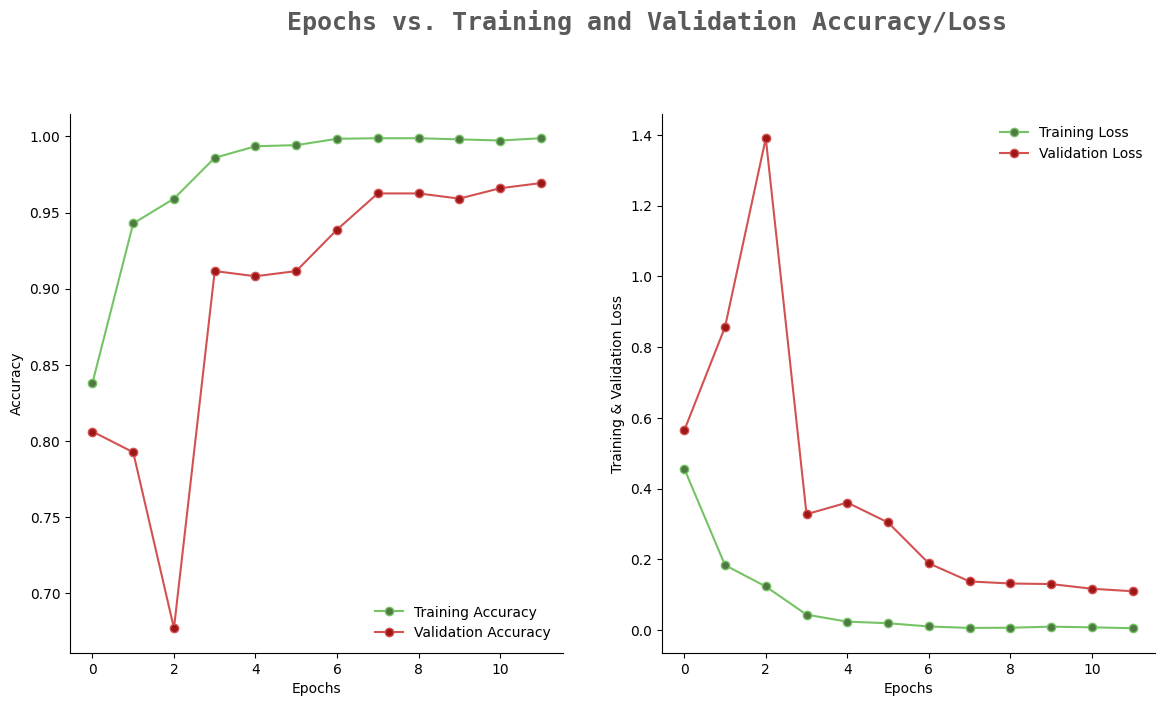

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 668ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.96      0.98      0.97        51
           2       0.97      0.96      0.96        96
           3       0.98      1.00      0.99        87

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



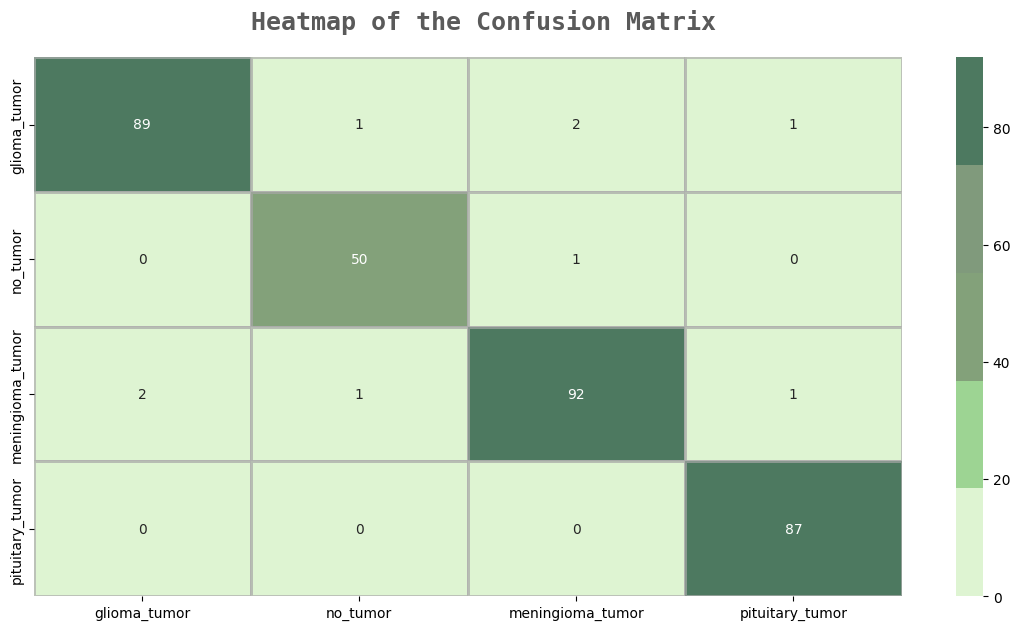

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Projects/BTC/models/Efficient_Net_3.h5')

## Feeding Input

In [ ]:
# Import libraries
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from PIL import Image  # Import for image processing

# Load the saved CNN model
# model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/BTC/models/Efficient_Net_4.keras')

# Define the labels
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Set image size
IMAGE_SIZE = (150, 150)

def preprocess_image(img_path):
  """
  Loads the image from the specified path, resizes it, and converts it to a NumPy array.
  """
  img = Image.open(img_path)  # Load the image using PIL
  img = img.resize(IMAGE_SIZE)  # Resize the image
  img_array = image.img_to_array(img)  # Convert to NumPy array
  img_array = np.expand_dims(img_array, axis=0)  # Add extra dimension
  return img_array

def predict(image_path):
  """
  Preprocesses the image and predicts the class with confidence.
  """
  img_array = preprocess_image(image_path)
  prediction = model.predict(img_array)
  predicted_label = labels[np.argmax(prediction)]
  confidence = np.max(prediction) * 100
  return predicted_label, confidence

# Example usage: Update the path to your actual image file
predicted_label, confidence = predict('/content/image(3).jpg')
print(f"Predicted Label: {predicted_label}, Confidence: {confidence:.2f}%")
